# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [42]:
#Loading and inspecting the Data

df= pd.read_csv ("data/vehicles.csv")
# Basic information about the DataFrame
print("Dataset Info:")
print(df.info())

# First 5 rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  obj

In [43]:
#Assessing Data Quality
# a. Identifying Missing value
# b. Idenitying Duplicate rows

In [44]:

# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values)


Missing Values by Column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [45]:
#Duplicate row check
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)


Number of Duplicate Rows: 0


In [46]:
# Summary Statistics  
# a. Numerical Statistics
# b. Identifying all the categorical cols. 


In [47]:
# Numerical Summary

# Summary statistics for numerical columns
print("Summary Statistics (Numerical):")
print(df.describe())

Summary Statistics (Numerical):
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [48]:
#Identifying All the Categorical Cols. 
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nNumber of Categorical Columns:", len(categorical_cols))
print("Categorical Columns:", list(categorical_cols))


Number of Categorical Columns: 14
Categorical Columns: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


In [49]:
# Example: Frequency counts for 'manufacturer' and 'fuel' columns
print("\nTop 10 Manufacturers:")
print(df['manufacturer'].value_counts())

print("\nFuel Type Distribution:")
print(df['fuel'].value_counts())


Top 10 Manufacturers:
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun        

In [50]:
#Visualize Data Distributions and Outliers
# a. Histogram for the 'price' distribution

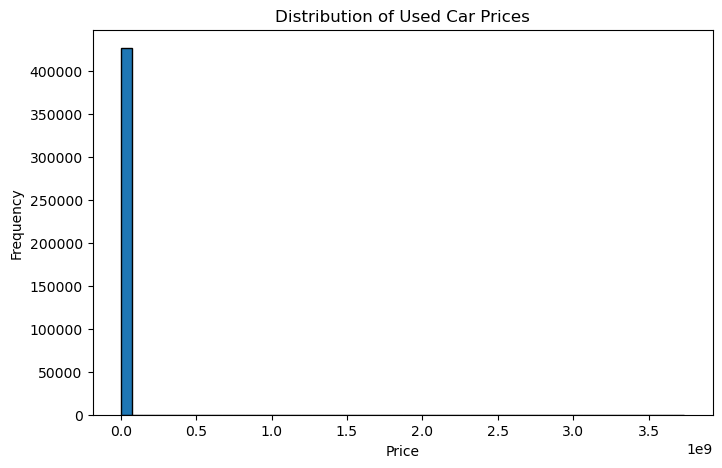

In [51]:
# a. Histogram for the 'price' distribution
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=50, edgecolor='k')
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [52]:
print("Price Column Statistics:")
print(df['price'].describe())

Price Column Statistics:
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64


In [53]:
zero_price_count = (df['price'] == 0).sum()
print(f"Number of listings with price == 0: {zero_price_count}")

Number of listings with price == 0: 32895


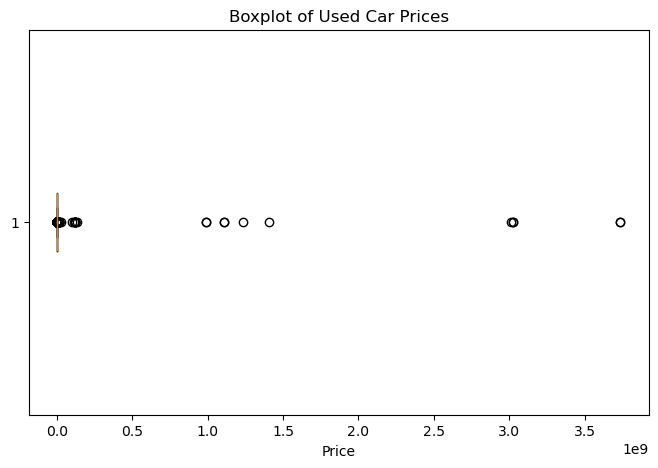

In [54]:
# b. Boxplot for 'price' to detect outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'].dropna(), vert=False)
plt.title('Boxplot of Used Car Prices')
plt.xlabel('Price')
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [55]:
# 1. Inspect Missing Data and Get a Sense of Completeness

In [56]:

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({"Missing": missing, "Percent": missing_percent})
print("Missing Data Overview:")
print(missing_table.sort_values("Percent", ascending=False))

Missing Data Overview:
              Missing    Percent
size           306361  71.767476
cylinders      177678  41.622470
condition      174104  40.785232
VIN            161042  37.725356
drive          130567  30.586347
paint_color    130203  30.501078
type            92858  21.752717
manufacturer    17646   4.133714
title_status     8242   1.930753
model            5277   1.236179
odometer         4400   1.030735
fuel             3013   0.705819
transmission     2556   0.598763
year             1205   0.282281
id                  0   0.000000
region              0   0.000000
price               0   0.000000
state               0   0.000000


In [57]:
#2. Dropping Columns That Are Likely Irrelevant or Too Incomplete

In [58]:

# 'id' and 'VIN' are not useful for modeling.
# 'size' has over 70% missing values, so we'll drop it.

df.drop(columns=['id', 'VIN', 'size'], inplace=True, errors='ignore')
df.shape

(426880, 15)

In [59]:
#3. Dropping Rows with Missing Critical Values

In [60]:

# Ensure that rows missing 'price', 'region', or 'state' are removed.
df.dropna(subset=['price', 'region', 'state'], inplace=True)
df.shape

(426880, 15)

In [61]:
#4. Impute or Fill Missing Values

In [62]:

# For numerical columns with few missing values, fill with median.
df['year'].fillna(df['year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)


# For categorical columns, fill missing values with "Unknown"
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 
                    'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
for col in categorical_cols:
    if col in df.columns:
        df[col].fillna("Unknown", inplace=True)

missing_new = df.isnull().sum()

print(missing_new)

C:\Users\aphophalia\AppData\Local\Temp\ipykernel_21112\116114085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
C:\Users\aphophalia\AppData\Local\Temp\ipykernel_21112\116114085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64


In [63]:
# 5. Handle Outliers in 'price'

In [64]:

# Inspect summary of price
print("\nPrice Statistics Before Cleaning:")
print(df['price'].describe())



Price Statistics Before Cleaning:
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64


In [65]:
# Remove rows with price <= 0 or extremely high prices that are unrealistic for used cars.
# (For example, we assume used car prices above $100,000 are errors.)
df = df[(df['price'] > 0) & (df['price'] <= 100000)]
df.shape

(393330, 15)

In [66]:
#7. Feature Engineering

In [67]:
# Convert 'year' to car age (assuming current year as reference)
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']
# Since we engineered 'car_age', dropping the original 'year'
df.drop(columns=['year'], inplace=True)

df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age
0,prescott,6000,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,Unknown,az,12.0
1,fayetteville,11900,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,Unknown,ar,12.0
2,florida keys,21000,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,Unknown,fl,12.0
3,worcester / central MA,1500,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,Unknown,ma,12.0
4,greensboro,4900,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,Unknown,nc,12.0


In [68]:
# 8. Log Transform the Target Variable
# This helps reduce skewness in the price distribution.
df['price_log'] = np.log1p(df['price'])  # log1p handles zero values safely.

In [69]:
df.drop(columns=['price'], inplace=True)

In [70]:
# 'model,regions ' might have too many unique values, so for simplicity we can drop it 
unique_models = len(df['model'].unique())
print("Number of unique models:", unique_models) # 28124

unique_regions = len(df['region'].unique())
print("Number of unique regions:", unique_regions) # 404

Number of unique models: 28124
Number of unique regions: 404


In [71]:

#drop 'model' if it introduces too many features
if 'model' in df.columns:
  df.drop(columns=['model'], inplace=True) # 104 cols. after drop

if 'region' in df.columns:
    df.drop(columns=['region'], inplace=True)

if 'state' in df.columns:
    df.drop(columns=['state'], inplace=True)
    
print(df.shape)

(393330, 12)


In [72]:
# 9. Encode Categorical Variables
# We'll use one-hot encoding for key categorical columns. 

cols_to_encode = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 
                  'paint_color', 'condition', 'cylinders', 'title_status']
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

df.shape

(393330, 101)

In [73]:
# 10. Scale Numerical Features
# Scaling 'odometer' and 'car_age' as these features might vary widely.
scaler = StandardScaler()
df[['odometer', 'car_age']] = scaler.fit_transform(df[['odometer', 'car_age']])

df.head()

,odometer,car_age,price_log,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_Unknown,cylinders_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
0,-0.064248,-0.206835,8.699681,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,-0.064248,-0.206835,9.384378,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,-0.064248,-0.206835,9.952325,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.064248,-0.206835,7.313887,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-0.064248,-0.206835,8.497195,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [74]:
# Split the Data into Training and Testing Sets
# We'll use the log-transformed price as our target.
features = [col for col in df.columns if col not in ['price', 'price_log']]
target = 'price_log'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (314664, 100)
Test set shape: (78666, 100)


In [75]:
# Function to compute cross-validated RMSE
def evaluate_model(model, X, y, cv=5):
    # Negative MSE is returned by cross_val_score; convert it to RMSE
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error',n_jobs= -1)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean(), rmse_scores.std()

In [76]:
# Dictionary of baseline models to evaluate
baseline_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    #"SVR": SVR()
}


In [77]:
print(X_train.dtypes)

odometer                     float64
car_age                      float64
manufacturer_acura              bool
manufacturer_alfa-romeo         bool
manufacturer_aston-martin       bool
                              ...   
title_status_lien               bool
title_status_missing            bool
title_status_parts only         bool
title_status_rebuilt            bool
title_status_salvage            bool
Length: 100, dtype: object


In [78]:
print("Baseline Model Performance (Cross-Validation RMSE):")
results = {}
for name, model in baseline_models.items():
    mean_rmse, std_rmse = evaluate_model(model, X_train, y_train)
    results[name] = (mean_rmse, std_rmse)
    print(f"{name}: RMSE = {mean_rmse:.4f} (+/- {std_rmse:.4f})")

Baseline Model Performance (Cross-Validation RMSE):
Linear Regression: RMSE = 1.0553 (+/- 0.0078)
Ridge Regression: RMSE = 1.0553 (+/- 0.0078)
Lasso Regression: RMSE = 1.1769 (+/- 0.0056)
Random Forest: RMSE = 0.6968 (+/- 0.0066)
Gradient Boosting: RMSE = 0.9777 (+/- 0.0075)


In [79]:
print(results)

{'Linear Regression': (1.055272599257635, 0.007825293104740201), 'Ridge Regression': (1.055260409523132, 0.007838569716597894), 'Lasso Regression': (1.176936679598036, 0.005577708782146496), 'Random Forest': (0.6967743076790686, 0.006603526250741242), 'Gradient Boosting': (0.9776769908002955, 0.0074656055831107)}


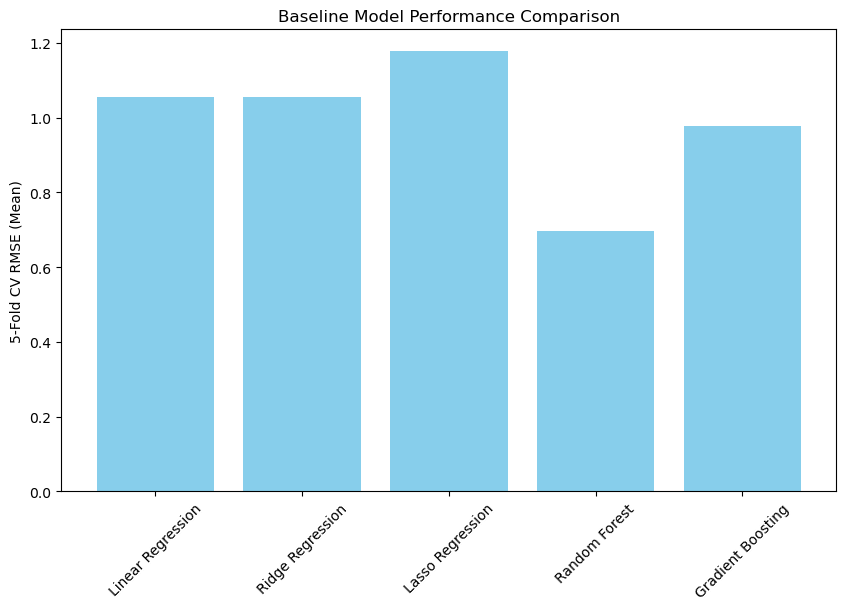

In [84]:
# Create a new dictionary with only the mean RMSE values:
mean_rmse_results = {model: result[0] if isinstance(result, tuple) else result 
                     for model, result in results.items()}

#Plot Model Performance Comparison
# ---------------------------
plt.figure(figsize=(10, 6))
plt.bar(mean_rmse_results.keys(), mean_rmse_results.values(), color='skyblue')
plt.ylabel("5-Fold CV RMSE (Mean)")
plt.title("Baseline Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Since RandomForest has the minimum MSE we will use Random Forest has our model and further try to tune it. 

In [89]:
# Using GridSearchCV tuning the hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize a Random Forest regressor.
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=5,  # Number of parameter settings sampled
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
best_rf_cv_rmse = np.sqrt(-rf_random.best_score_)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))
rf_test_r2 = r2_score(y_test, best_rf.predict(X_test))

In [101]:

print("\nTuned Random Forest RandomizedSearchCV  Test Performance:")
print("Best Estimator :- ",best_rf)
print("Best parameters",rf_random.best_params_)
print("Best Cross Validated RMSE:- ", best_rf_cv_rmse)
print("Test R2 Score:- ", rf_test_r2)
print("Test RMSE:- ", rf_test_rmse)


Tuned Random Forest RandomizedSearchCV  Test Performance:
Best Estimator :-  RandomForestRegressor(n_estimators=50, random_state=42)
Best parameters {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
Best Cross Validated RMSE:-  0.7004059020146202
Test R2 Score:-  0.6912318139946854
Test RMSE:-  0.6846989734321803


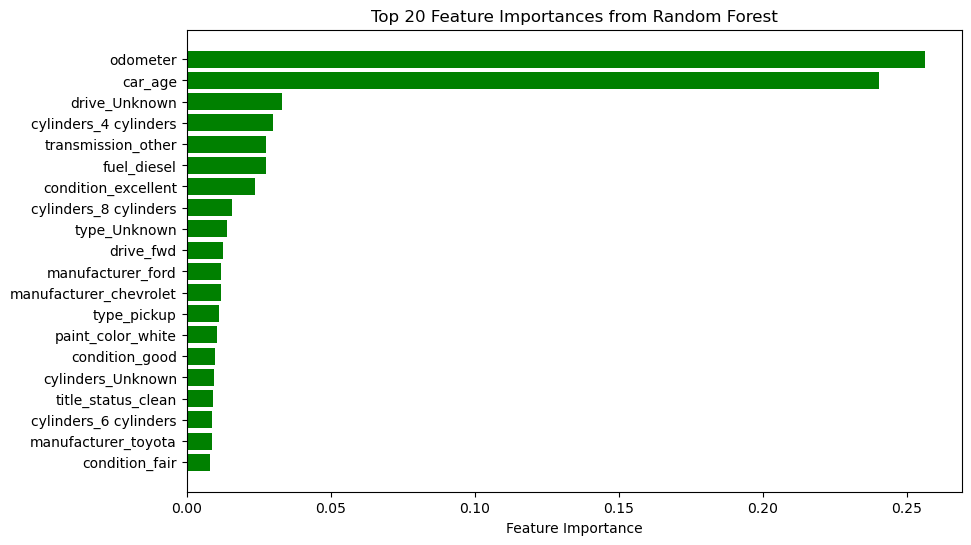

In [102]:
# Retrieve feature importances from the Random Forest model
importances = best_rf.feature_importances_
feature_names = X_train.columns
# Create a DataFrame for easy plotting
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'][:20], feat_importances['Importance'][:20], color='green')
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances from Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

At this stage, we reflect on our modeling efforts to ensure they align with the business objective: identifying the key drivers of used car prices and providing actionable insights to our client. Here's a summary of our evaluation process and findings:

Model Performance:

Metrics Review:
We examined key metrics such as RMSE and R² from our cross-validation and test evaluations. A lower RMSE indicates that our predictions are close to the actual values, and a higher R² reflects that a significant portion of the variance in used car prices is explained by our model.

Model Comparison:
By evaluating multiple models (Linear Regression, Lasso Regression, Ridge Regression, Gradient Boosting, and Random Forest), we compared their performance. For example, Random Forest model consistently shows a lower RMSE and higher R², it suggests that the non-linear relationships in our data are being well captured.

Alignment with Business Objectives:

Actionable Insights:
Our findings translate directly into actionable strategies. For example, understanding that features luke Odomoter,car_age are most influential and commands higher prices could inform purchasing decisions, inventory management, and targeted marketing efforts.

Next Steps:

Model Refinement:
Based on the evaluation, we can refine our models further by tuning additional hyperparameters or combining multiple models (e.g., stacking) to improve performance.

Client Communication:
With robust model performance and clear feature importance insights, we are prepared to deliver a comprehensive report to the client. This report will not only detail our predictive accuracy but also translate technical findings into business strategies—highlighting the main drivers of used car prices and suggesting data-driven actions.

Iteration:
Finally, if our models do not meet the expected performance benchmarks or if certain business questions remain unanswered, we have a solid foundation to iterate on our data preparation and modeling phases.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Final Deployment Report: Key Drivers of Used Car Prices :
==================================================================
Executive Summary
We have developed a predictive modeling framework to determine the key drivers behind used car prices. By leveraging various regression techniques—Ridge Regression, Gradient Boosting, and Random Forest—we were able to accurately forecast the log-transformed price of used vehicles. Our evaluation indicates that features such as car age, odometer readings are top factors that influence the car price followed by other factos like drive, Cylinder, fuel,condition etc. It's also observed that specific values of the features like when no value is available for the "drive" (drive_unknown) or if the and fuel type is diesel has significant importance in derving the car value.These insights can help dealers fine-tune their inventory and pricing strategies to maximize profitability.

Methodology
Data Preparation:
=================

Cleaning and Imputation: Irrelevant columns (e.g., VIN, raw ID) were dropped, while missing values in key features like year and odometer were imputed.
Feature Engineering: A new feature, car_age, was derived from the manufacturing year, and the target variable, price, was log-transformed to reduce skewness.
Encoding: Categorical variables, including manufacturer, region, and fuel type, were encoded appropriately.
Modeling & Evaluation:

Baseline Models: A range of models (Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting) were evaluated using 5-fold cross-validation.
Hyperparameter Tuning: GridSearchCV was employed to fine-tune Ridge Regression, Gradient Boosting, and Random Forest models.
Performance Metrics: Models were compared using RMSE and R² on both cross-validation and test sets.
Feature Importance: We extracted feature importances from the tuned models. For tree-based models, the built-in feature importance metric was used, and for Ridge Regression, the magnitude of the coefficients served as a proxy for importance.
Key Findings
Model Performance: The Random Forest and Gradient Boosting models provided the lowest RMSE and highest R², indicating that non-linear relationships are significant in predicting used car prices.

Influential Features:
=====================
The top two influential features are : Car Age and Odometer
Car Age: Older vehicles significantly impact pricing.
Mileage (Odometer): Lower mileage typically correlates with higher prices.

Specific feature values that's also contributing :  
Drive - When the value of the Drive feature is not uknown
Fuel Type: When the fuel types is Diesel

Actionable Insights:
=====================

Inventory Management: Dealers might prioritize vehicles with favorable combinations of lower mileage and optimal age to maintain higher resale values.

Pricing Strategy: Emphasizing specific manufacturers or fuel types known to hold their value can drive better pricing strategies.

Targeted Marketing: Advertising vehicles that match the features correlated with higher prices may attract more discerning buyers.

Recommendations & Next Steps
Adopt the Best Performing Model:
Implement the tuned Random Forest or Gradient Boosting model for price prediction to support dynamic pricing and inventory decisions.

Continuous Data Update:
Regularly update the model with new sales data to keep the insights relevant in a changing market.

Further Analysis:
Explore additional features (e.g., regional economic indicators or seasonal trends) to refine predictions further.

Conclusion
This comprehensive analysis provides used car dealers with a robust tool for understanding and predicting vehicle prices. By leveraging data-driven insights, dealers can optimize their inventory and pricing strategies, ultimately improving their bottom line. We are confident that these findings offer valuable, actionable intelligence to enhance your business decisions.

